<a href="https://colab.research.google.com/github/PD7-debug/Assignment-Mod-1/blob/main/Boosting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory Question

## Q1. What is Boosting in Machine Learning?

**Answer:** Boosting is an ensemble technique that combines multiple weak learners in sequence to create a strong learner. Each model learns from the errors of the previous one to improve performance.

## Q2. How does Boosting differ from Bagging?

**Answer:** Bagging builds models independently in parallel and averages their results to reduce variance. Boosting builds models sequentially, where each model focuses on correcting errors of its predecessor, reducing bias.

## Q3. What is the key idea behind AdaBoost?

**Answer:** AdaBoost focuses on misclassified instances by increasing their weights in subsequent iterations, allowing the next model to focus more on difficult cases.

## Q4. Explain the working of AdaBoost with an example.

**Answer:** AdaBoost starts by assigning equal weights to all instances. After each iteration, it increases the weights of misclassified points and decreases weights for correct ones. The final model combines all weak learners using their accuracy.

## Q5. What is Gradient Boosting, and how is it different from AdaBoost?

**Answer:** Gradient Boosting builds models sequentially like AdaBoost but minimizes a loss function using gradient descent. It builds trees that predict the residuals of previous trees.

## Q6. What is the loss function in Gradient Boosting?

**Answer:** The most common loss function in Gradient Boosting is Mean Squared Error for regression and Log Loss for classification. It can be customized depending on the problem.

## Q7. How does XGBoost improve over traditional Gradient Boosting?

**Answer:** XGBoost improves Gradient Boosting with regularization, parallel processing, tree pruning, and handling missing values efficiently. It is faster and more accurate for many tasks.

## Q8. What is the difference between XGBoost and CatBoost?

**Answer:** XGBoost is optimized for speed and performance using numerical features. CatBoost is specifically optimized for categorical features and handles them without preprocessing.

## Q9. What are some real-world applications of Boosting techniques?

**Answer:** Boosting is used in fraud detection, churn prediction, recommendation systems, and high-accuracy tasks like search engines and medical diagnosis.

## Q10. How does regularization help in XGBoost?

**Answer:** Regularization in XGBoost (via L1 and L2 penalties) helps reduce overfitting by penalizing model complexity, making it generalize better to new data.

## Q11. What are some hyperparameters to tune in Gradient Boosting models?

**Answer:** Important hyperparameters include learning rate, number of estimators, max depth, subsample, min samples split, and regularization terms like alpha and lambda.

## Q12. What is the concept of Feature Importance in Boosting?

**Answer:** Feature Importance in Boosting shows how valuable each feature is in making predictions, often derived from how frequently a feature is used for splits in trees.

## Q13. Why is CatBoost efficient for categorical data?

**Answer:** CatBoost handles categorical features internally using efficient encoding, reducing the need for preprocessing and improving performance on mixed-type data.

#Practical Question

## Q14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9555555555555556


## Q15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = AdaBoostRegressor(n_estimators=50)
model.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))

MAE: 0.7241581305314803


## Q16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
model = GradientBoostingClassifier()
model.fit(X, y)
print("Feature Importances:", model.feature_importances_)

Feature Importances: [3.98359923e-05 2.52145450e-02 5.05740127e-04 6.30181590e-04
 2.06049210e-05 1.62449926e-03 3.16535247e-04 1.30818329e-01
 3.62833217e-04 5.22412972e-04 2.99182350e-03 3.41513597e-03
 2.75505385e-03 8.32678414e-03 7.52146659e-04 6.03174677e-03
 3.76891855e-03 4.43732157e-03 2.13692944e-03 1.00627171e-03
 4.39993781e-01 3.78438396e-02 1.52025854e-01 2.99704198e-02
 7.19503257e-03 1.43297714e-03 1.31960606e-02 1.20624496e-01
 1.76102752e-03 2.78862549e-04]


## Q17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print("R2 Score:", r2_score(y_test, model.predict(X_test)))

R2 Score: 0.7881673686795221


## Q18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Compare Accuracy
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:28:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9561
XGBoost Accuracy: 0.9561


## Q19. Train a CatBoost Classifier and evaluate using F1-Score.

In [7]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
print("F1 Score:", f1_score(y_test, cat.predict(X_test), average='macro'))

ModuleNotFoundError: No module named 'catboost'

## Q20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))

MSE: 0.04869866371154785


## Q21. Train an AdaBoost Classifier and visualize feature importance.

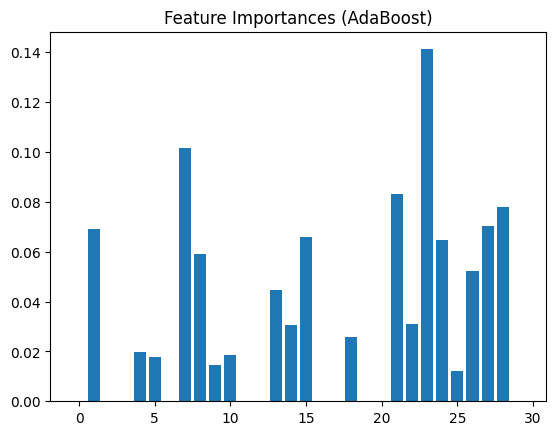

In [9]:
import matplotlib.pyplot as plt
import numpy as np

model = AdaBoostClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances (AdaBoost)")
plt.show()

## Q22. Train a Gradient Boosting Regressor and plot learning curves.

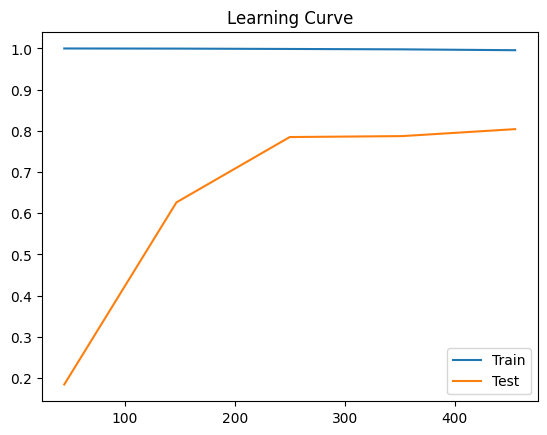

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

gbr = GradientBoostingRegressor()
train_sizes, train_scores, test_scores = learning_curve(gbr, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.legend()
plt.title("Learning Curve")
plt.show()

## Q23. Train an XGBoost Classifier and visualize feature importance.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


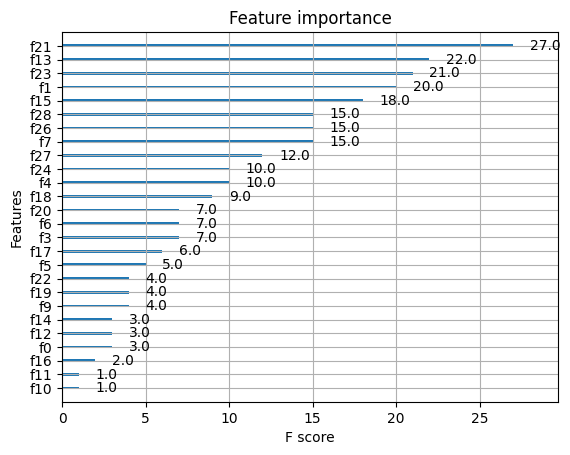

In [11]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

## Q24. Train a CatBoost Classifier and plot the confusion matrix.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


ModuleNotFoundError: No module named 'catboost'

## Q25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

In [13]:
for n in [10, 50, 100]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print(f"{n} Estimators Accuracy:", model.score(X_test, y_test))

10 Estimators Accuracy: 0.9649122807017544
50 Estimators Accuracy: 0.9649122807017544
100 Estimators Accuracy: 0.9736842105263158


## Q26. Train a Gradient Boosting Classifier and visualize the ROC curve.

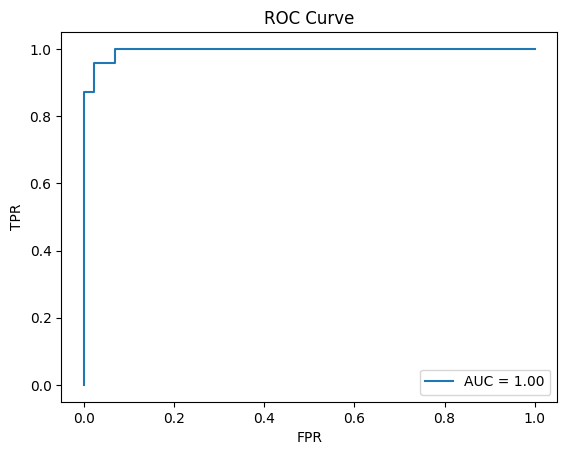

In [14]:
from sklearn.metrics import roc_curve, auc

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_scores = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Q27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.1, 0.2]}
grid = GridSearchCV(XGBRegressor(), param_grid=params, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.1}


## Q28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost without class weighting
model_no_weight = CatBoostClassifier(verbose=0)
model_no_weight.fit(X_train, y_train)
preds_no_weight = model_no_weight.predict(X_test)
print("Without Class Weighting:\n", classification_report(y_test, preds_no_weight))

# Train CatBoost with class weighting
class_weights = {0: 1, 1: 10}
model_with_weight = CatBoostClassifier(class_weights=class_weights, verbose=0)
model_with_weight.fit(X_train, y_train)
preds_with_weight = model_with_weight.predict(X_test)
print("With Class Weighting:\n", classification_report(y_test, preds_with_weight))


ModuleNotFoundError: No module named 'catboost'

## Q29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [17]:
for lr in [0.01, 0.1, 1]:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    print(f"Learning Rate {lr}: Accuracy = {model.score(X_test, y_test)}")

Learning Rate 0.01: Accuracy = 0.9385964912280702
Learning Rate 0.1: Accuracy = 0.956140350877193
Learning Rate 1: Accuracy = 0.9649122807017544


## Q30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [18]:
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log Loss: 0.1104848434352405
